[참조] 


Keyword extraction process: https://github.com/lovit/KR-WordRank




# Keyword extraction

In [ ]:
# ! pip install  krwordrank

In [1]:
import pandas as pd

df = pd.read_csv('./Data/네이버_뉴스_코인_20220509_20220609.csv')

In [2]:
import sys
sys.path.append('../')

from krwordrank.word import KRWordRank
import krwordrank

(Substring graph를 만들기 위하여 substring의 최소 등장 빈도수 (min count)와 substring의 최대 길이 (max length)를 입력해야 합니다.)

In [3]:
# min_count = 5   # 단어의 최소 출현 빈도수 (그래프 생성 시)
# max_length = 10 # 단어의 최대 길이
# wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length)

In [9]:
texts = list(df['Article'])

(KR-WordRank는 PageRank 와 비슷한 graph ranking 알고리즘을 이용하여 단어를 추출합니다 (HITS algorithm 을 이용합니다). Substring graph에서 node (substrig) 랭킹을 계산하기 위하여 graph ranking 알고리즘의 parameters 가 입력되야 합니다.)

In [10]:
# beta = 0.85    # PageRank의 decaying factor beta
# max_iter = 10
# keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

Graph ranking 이 높은 노드들(substrings)이 후처리 과정을 거쳐 단어로 출력됩니다. 기사 댓글 데이터에서 키워드 (단어) 추출을 한 결과는 다음과 같습니다.

In [53]:
# for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:10]:
#         print('%8s:\t%.4f' % (word, r))

In [20]:
# words = ''
# for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:200]:
#     words = words + ' '+ word
    


In [63]:
from krwordrank.word import summarize_with_keywords

keywords = summarize_with_keywords(texts, min_count=5, max_length=10,
     beta=0.85, max_iter=10, verbose=True)

scan vocabs ... 
num vocabs = 21892
done = 10


In [65]:
keywords

{'코인': 58.7455953588084,
 '있다.': 58.0411982230128,
 '투자': 43.79801286598899,
 '거래': 43.47525562288058,
 '루나': 39.13864626819275,
 '것으로': 32.51772838866678,
 '지난': 32.4983489847677,
 '테라': 31.086325789903785,
 '대한': 29.335908290897773,
 '비트코': 29.05426804009015,
 '가상': 28.977605311042698,
 '따르면': 28.403276554671862,
 '시장': 24.994666510827052,
 '미국': 24.449520300844117,
 '가격': 24.323593428161693,
 '기준': 22.40232219701267,
 '있는': 21.179115238956012,
 '이날': 21.096860376523615,
 '오른': 19.529025893301238,
 '통해': 19.070896820867848,
 '스테이블': 17.922533381860166,
 '관련': 17.454043341248113,
 '하락한': 16.912591377825592,
 '국내': 16.36254595797749,
 '사태': 16.34633411262004,
 '상승한': 15.882427051001383,
 '폭락': 15.590529103075516,
 '최근': 15.495313751350322,
 '암호': 15.11248343217723,
 '현재': 14.37207678021106,
 '경우': 14.143700142647265,
 '이후': 14.033687834238247,
 '대비': 13.922556650388263,
 '금융': 13.343086136113575,
 '같은': 13.321848116957026,
 '업비트': 12.996089176206322,
 '밝혔다.': 12.697571696973709,
 '글로벌'

In [66]:
# keywords 중에서 불용어 선택해서 제거 

stopwords = '코인 있다. 것으로 지난 대한 비트코 따르면 있는 이날 최근 현재 경우 이후 같은. 것이 따라 오전 각각 대해 했다. 0. 해당 하는 to 이번 때문에 이런 이를 등을 하지만 것은 것을 모두 그는 보고 이는 단위)당 기자 위한 이에 한다 가장 있습니다. 일제히 아니라 24 역시 1. 보이고 것”이라고 않고 아직 한때 그러나 등에 없다 7일 현상이 다만 들어 11 나타 오는 다양한 31일 전일 있어 ◆이서영> 특히 1분기 이들'
stopwords = stopwords.split(' ')

In [67]:
from krwordrank.word import summarize_with_keywords

keywords = summarize_with_keywords(texts, min_count=5, max_length=10,
     beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)


scan vocabs ... 
num vocabs = 21892
done = 10


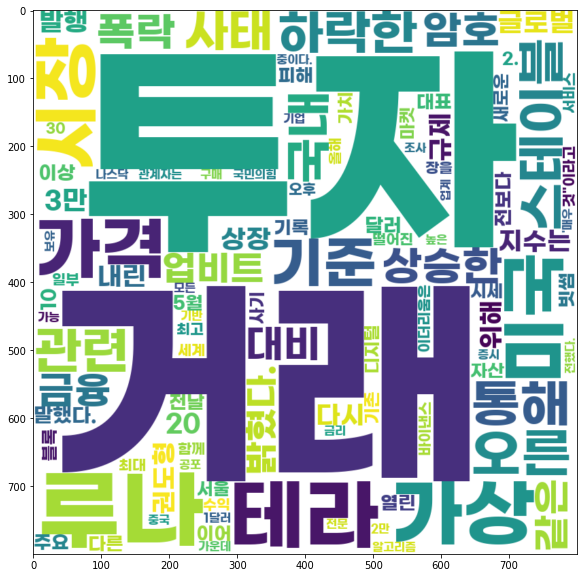

In [68]:
from wordcloud import WordCloud

# Set your font path
font_path = './Data/GmarketSansTTFBold.ttf'

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(keywords)

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

Python 의 wordcloud package 를 이용하면 키워드에 관한 word cloud figure 를 그릴 수 있습니다.

Figure 에 나타내지 않을 일반적인 단어 (stopwords) 를 제거하여 passwords 를 만듭니다. dict 형식으로 {단어:점수} 형식이어야 합니다.



In [ ]:
# fig.savefig('./Data/all_article_wordcloud.png')

# Key-sentence extraction

 KR-WordRank 에서는 keywords 를 많이 포함한 문장을 핵심 문장으로 선택합니다.
 
문장을 추출하는 원리는 추출된 키워드의 랭크값을 이용하여 키워드 벡터를 만든 뒤, 코싸인 유사도 기준으로 입력된 문장 벡터가 키워드 벡터와 유사한 문장을 선택하는 것입니다.

summarize_with_sentences 함수에 texts 를 입력하면 KR-WordRank 를 학습하여 키워드와 이를 이용한 핵심 문장을 선택합니다.

In [39]:
from krwordrank.sentence import summarize_with_sentences

keywords, sents = summarize_with_sentences(texts, num_keywords=100, num_keysents=20)

몇 가지 패러매터를 추가할 수 있습니다. 길이가 지나치게 길거나 짧은 문장을 제거하기 위해 penalty 함수를 정의합니다. 

아래는 길이가 10 글자부터 300 글자인 문장을 선호한다는 의미입니다. stopwords 는 키워드에서 제거합니다. 이들은 키워드벡터를 만들 때에도 이용되지 않습니다. 또한 키워드 벡터와 유사한 문장을 우선적으로 선택하다보면 이전에 선택된 문장과 중복되는 문장들이 선택되기도 합니다. 이는 diversity 를 이용하여 조절할 수 있습니다. diversity 는 코싸인 유사도 기준 핵심문장 간의 최소 거리 입니다. 이 값이 클수록 다양한 문장이 선택됩니다.

In [70]:
penalty = lambda x:0 if (10 <= len(x) <= 300) else 1
stopwords = '코인 있다. 것으로 지난 대한 비트코 따르면 있는 이날 최근 현재 경우 이후 같은. 것이 따라 오전 각각 대해 했다. 0. 해당 하는 to 이번 때문에 이런 이를 등을 하지만 것은 것을 모두 그는 보고 이는 단위)당 기자 위한 이에 한다 가장 있습니다. 일제히 아니라 24 역시 1. 보이고 것”이라고 않고 아직 한때 그러나 등에 없다 7일 현상이 다만 들어 11 나타 오는 다양한 31일 전일 있어 ◆이서영> 특히 1분기 이들'
stopwords = stopwords.split(' ')


keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.5,
    num_keywords=100,
    num_keysents=20,
    verbose=False
)

이번에 추출된 키워드에는 영화, 관람객, 너무 와 같은 stopwords 가 제거되었습니다.

In [71]:
keywords

{'투자': 43.79801286598899,
 '거래': 43.47525562288058,
 '루나': 39.13864626819275,
 '테라': 31.086325789903785,
 '가상': 28.977605311042698,
 '시장': 24.994666510827052,
 '미국': 24.449520300844117,
 '가격': 24.323593428161693,
 '기준': 22.40232219701267,
 '오른': 19.529025893301238,
 '통해': 19.070896820867848,
 '스테이블': 17.922533381860166,
 '관련': 17.454043341248113,
 '하락한': 16.912591377825592,
 '국내': 16.36254595797749,
 '사태': 16.34633411262004,
 '상승한': 15.882427051001383,
 '폭락': 15.590529103075516,
 '암호': 15.11248343217723,
 '대비': 13.922556650388263,
 '금융': 13.343086136113575,
 '같은': 13.321848116957026,
 '업비트': 12.996089176206322,
 '밝혔다.': 12.697571696973709,
 '글로벌': 12.544342671147714,
 '20': 11.98287259784614,
 '3만': 11.96662502961519,
 '상장': 11.949734133931523,
 '권도형': 11.269168210833996,
 '발행': 11.131612577817673,
 '지수는': 11.061405329758708,
 '규제': 10.988919005776646,
 '내린': 10.932699189475601,
 '위해': 10.71372390402163,
 '다시': 10.60727479938624,
 '말했다.': 10.407298982429621,
 '이상': 10.03960988977184,
 

20220509~20220609 까지의 코인 관련 기사에서 핵심 문장 20개 출력

In [86]:
sents

['     비트코인이 3900만 원 중반대에서 거래되고 있습니다.오늘(25일) 오전 9시 30분 기준 국내 암호화폐 거래소 업비트에서 비트코인은 24시간 전보다 0.51% 오른 3959만 8000원을 기록 중입니다.\xa0빗썸에서는 4.11% 상승한 3955만 원을 나타내고 있습니다.\xa0미국 증권거래위원회의 가상자산 거래소 바이낸스 조사 소식이 전해지면서 전날 한때 3750만 원선까지 내려갔던 비트코인은 간밤 미 증시 상승 영향 등으로 오름세를 보이고 있습니다.   ',
 '     (서울=뉴스1) 박지혜 기자 = 3일 서울 서초구 빗썸 고객센터 전광판에 비트코인 시세가 나타나고 있다.  암호화폐(가상화폐)계의 치어리더라고 할 수 있는 윙클보스 쌍둥이 형제가 운영하는 암호화폐거래소 제미니가 직원 10%을 감원한다고 CNBC가 2일(현지시간) 보도했다.윙클보스 형제는 이날 블로그 게시물을 통해 “암호화폐 겨울이 다가오고 있다”며 “제미니의 직원 10%를 감원할 계획”이라고 밝혔다. 2022.6.12/뉴스1   ',
 ' [KBS 대전]자신이 운영하는 가상화폐 회사에 투자하면 30배에 달하는 수익을 얻을 수 있다고 속여 돈을 가로챈 30대에게 실형이 선고됐습니다.대전지법 형사5단독 김정헌 판사는 사기 혐의로 기소된 30대 유 모 씨에게 징역 3개월을 선고했습니다.유 씨는 2019년 10월 허가를 받지 않은 다단계 형태의 회사를 운영하면서 피해자 A 씨에게 자신의 코인 회사에 투자하면 석 달 뒤 투자금의 30배를 받을 수 있다고 말한 뒤 천만 원을 받아 챙긴 혐의로 기소됐습니다. ',
 '     [서울=뉴시스] 고승민 기자 = kkssmm99@newsis.com[사진 영상 제보받습니다] 공감언론 뉴시스가 독자 여러분의 소중한 제보를 기다립니다. 뉴스 가치나 화제성이 있다고 판단되는 사진 또는 영상을 뉴시스 사진영상부(n-photo@newsis.com)로 보내주시면 적극 반영하겠습니다. ',
 '    북한 공작원의 지령을 받고 군 전산망을 해킹하려 한 혐의를

In [87]:
with open('./Data/articles_keysentences.txt','w',encoding='UTF-8') as f:
    for sentence in sents:
        f.write(sentence + '\n')